In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

$$Score(c_k) = \alpha\cdot\textit{Rank}(\rho_k) + (1-\alpha)  \cdot \big( |C| - \textit{Rank}( acc(c_k) ) \big)$$

In [13]:
#np.save( 'rank_plus_atk_alpha00.npy',np.array(list(list_opt_acc.values()) ))

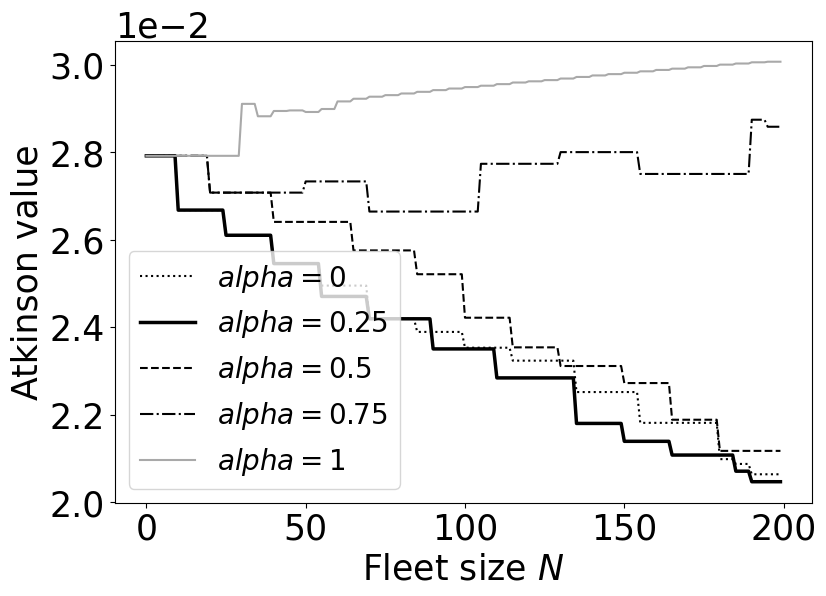

In [14]:
Opt_00 = np.load('list_opt_acc_per_bus_alpha00.npy')
Opt_25 = np.load('list_opt_acc_per_bus_alpha25.npy')
Opt_50 = np.load('list_opt_acc_per_bus_alpha50.npy')
Opt_75 = np.load('list_opt_acc_per_bus_alpha75.npy')

Opt_100 = np.load('list_opt_acc_per_bus_alpha100.npy')

#Opt_100 = np.load('rank_plus_atk_alpha100.npy')
#Opt_y_devide_x = np.load('list_opt_acc_per_bus_yx.npy')

x = [i for i in range(200)]


plt.figure(figsize=(9,6))


plt.plot(x,Opt_00,color='black',label = '$alpha = 0$',linestyle='dotted',linewidth=1.5)
plt.plot(x,Opt_25,color='black',label = '$alpha = 0.25$',linewidth=2.5)
plt.plot(x,Opt_50,color='black',label = '$alpha = 0.5$',linestyle='--',linewidth=1.5)
plt.plot(x,Opt_75,color='black',label = '$alpha = 0.75$',linestyle='-.',linewidth=1.5)

plt.plot(x,Opt_100,color='darkgrey',label = '$alpha = 1$',linewidth=1.5)
# plt.plot(x,Opt_25_75[:,0],color='green',label = '$alpha = 0.25$')
# plt.plot(x,Opt_75_25[:,0],color='black',label = '$alpha = 0.75$',linestyle='--')


#plt.axhline( y = Initial_[0], color='darkgrey',linestyle='dotted',label = 'Initial PT',linewidth=1.5)
plt.xlabel('Fleet size $N$')
plt.ylabel('Atkinson value')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.legend(loc='best', prop = {'size':20})
plt.rcParams.update({'font.size': 25})
plt.savefig("Fig4.jpg",dpi=600)
plt.show()

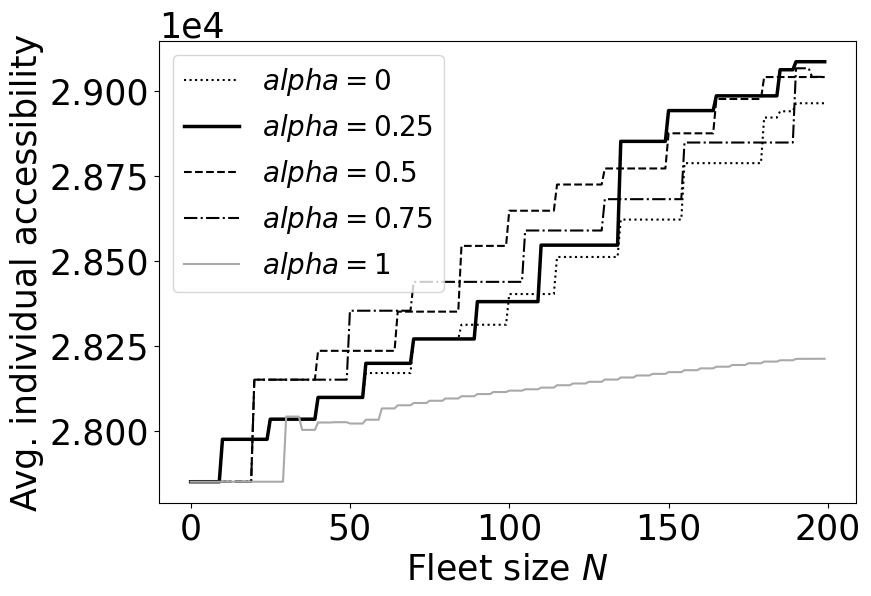

In [15]:
mean_00 = np.load('list_mean_acc_per_bus_alpha00.npy')
mean_25 = np.load('list_mean_acc_per_bus_alpha25.npy')
mean_50 = np.load('list_mean_acc_per_bus_alpha50.npy')
mean_75 = np.load('list_mean_acc_per_bus_alpha75.npy')

mean_100 = np.load('list_mean_acc_per_bus_alpha100.npy')




plt.figure(figsize=(9,6))


plt.plot(x,mean_00,color='black',label = '$alpha = 0$',linestyle='dotted',linewidth=1.5)
plt.plot(x,mean_25,color='black',label = '$alpha = 0.25$',linewidth=2.5)
plt.plot(x,mean_50,color='black',label = '$alpha = 0.5$',linestyle='--',linewidth=1.5)
plt.plot(x,mean_75,color='black',label = '$alpha = 0.75$',linestyle='-.',linewidth=1.5)

plt.plot(x,mean_100,color='darkgrey',label = '$alpha = 1$',linewidth=1.5)
#plt.plot(x,Opt_y_devide_x,color='darkgrey',label = '$Baseline$',linewidth=1.5)
# plt.plot(x,Opt_25_75[:,0],color='green',label = '$alpha = 0.25$')
# plt.plot(x,Opt_75_25[:,0],color='black',label = '$alpha = 0.75$',linestyle='--')


#plt.axhline( y = Initial_[0], color='darkgrey',linestyle='dotted',label = 'Initial PT',linewidth=1.5)
plt.xlabel('Fleet size $N$')
plt.ylabel('Avg. individual accessibility')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.legend(loc='best', prop = {'size':20})
plt.rcParams.update({'font.size': 25})
plt.savefig("Fig4.jpg",dpi=600)
plt.show()

In [6]:
import numpy as np
import networkx as nx
import sys
import random
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mping
import math

import graph
import ptline
import scenario_builder
import time
import pickle
import copy

import multiprocessing

import pandas as pd

In [7]:
walk_speed = 4.5
g = scenario_builder.build_initial_graph(walk_speed)

In [8]:
all_stations = g.all_stations
all_edges = g.all_edges
centr_id_matr = g.centr_id_matr
acc_matr_init = g.acc_matr

In [9]:
g_lines = nx.DiGraph(list_waiting_time=[], walking_speed=walk_speed)
g_lines.add_nodes_from([i for i in range( len(all_stations) )])
g_lines.add_edges_from(all_edges)

In [10]:
g_lines = nx.DiGraph(list_waiting_time=[], walking_speed=walk_speed)
g_lines.add_nodes_from([i for i in range( len(all_stations) )])
g_lines.add_edges_from(all_edges)

In [11]:
centroid_population = g.centroid_population
total_population = g.total_population
print(f"total_population={total_population} people")

total_population=693728 people


In [12]:
np.array(g.compute_accessibility()[1]) 

array([30933.58677252, 27289.39027139, 24376.06483833, 25913.87417619,
       29259.63269099, 27984.82025822, 25456.16606632, 21316.89912269,
       30729.93064251, 27313.31577671, 25099.53555059, 27469.13348787,
       36204.97869751, 37941.91314691, 29499.53768435, 23794.9333038 ,
       34183.46820478, 29679.04329726, 29416.76418274, 29013.64943128,
       31718.07143987, 35124.93233376, 27962.20361049, 25090.48709112,
       29153.061828  , 37067.96426535, 33551.46884423, 34229.53351444,
       35576.14453054, 36371.4758764 , 31264.37460547, 26277.26598334,
       25092.87973392, 21502.97396711, 26207.93607788, 33113.2593883 ,
       39356.52053742, 41376.89868156, 45124.18433947, 38598.85439665,
       34231.05151896, 31766.51515848, 29692.23578384, 24378.91862797,
       23845.30563561, 23421.5525393 , 25589.83680564, 29900.83793893,
       36001.98166014, 49902.04057418, 40102.91342782, 37766.89388601,
       37685.80864593, 37101.5110294 , 34207.12277087, 30774.99404162,
      

In [13]:
Opt1_00 = np.load('list_step_worst_area_alpha00.npy')
Opt1_25 = np.load('list_step_worst_area_alpha25.npy')
Opt1_50 = np.load('list_step_worst_area_alpha50.npy')
Opt1_75 = np.load('list_step_worst_area_alpha75.npy')
#Opt1_100 = np.load('rank_plus_atk_alpha100.npy')
Opt1_y_devide_x = np.load('list_step_worst_area_yx.npy')

x = [i for i in range(200)]

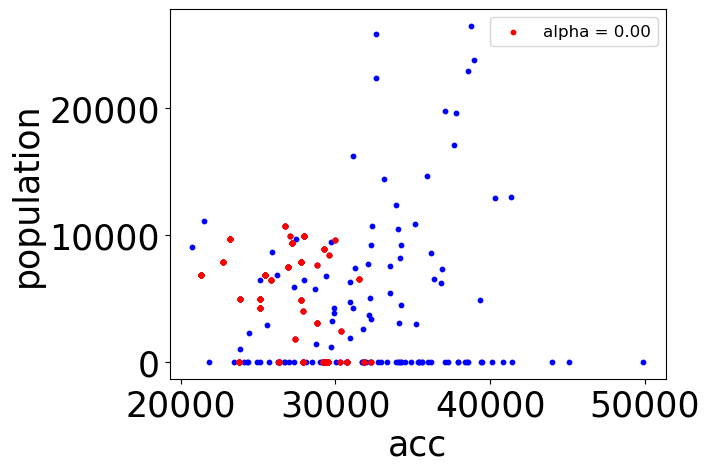

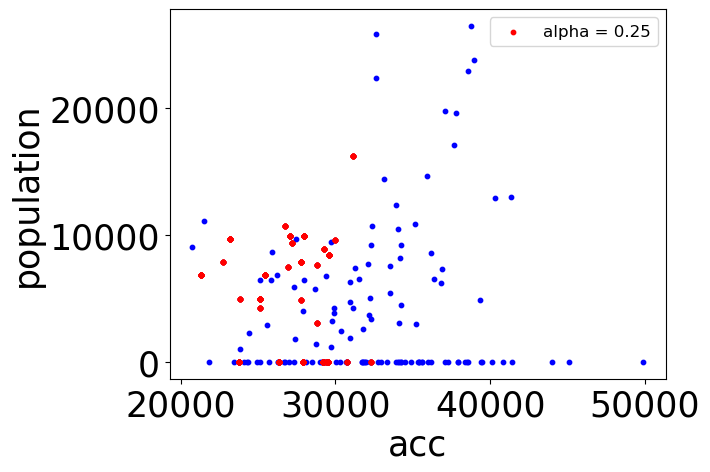

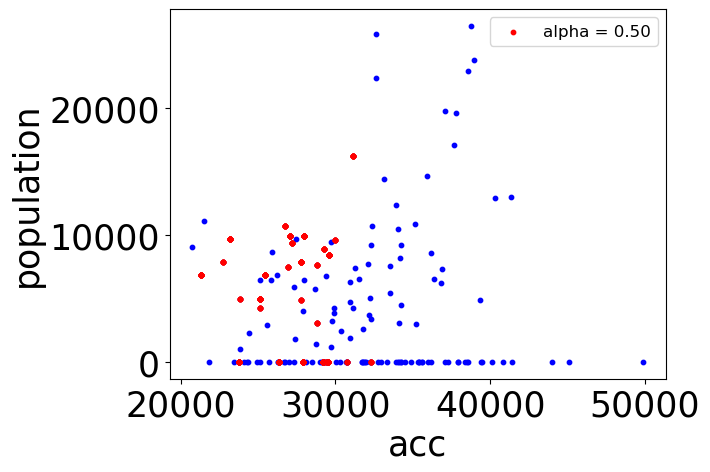

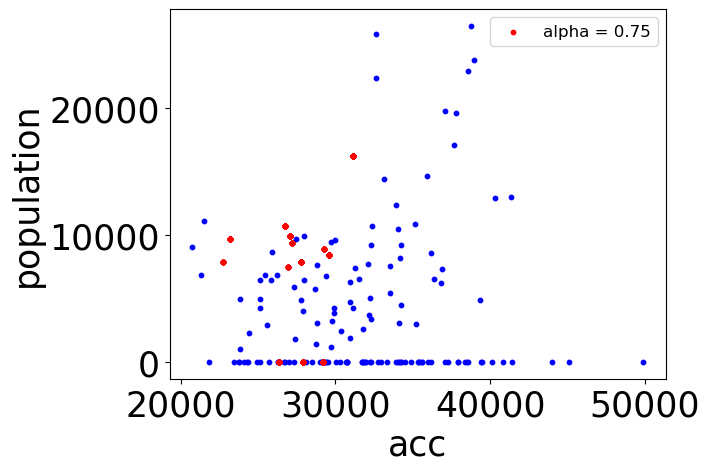

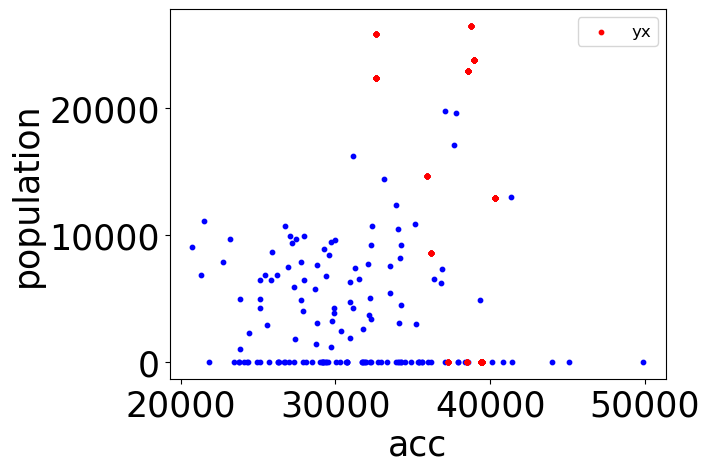

In [14]:
list_label = ['alpha = 0.00','alpha = 0.25','alpha = 0.50','alpha = 0.75','yx']
kl = [Opt1_00,Opt1_25,Opt1_50,Opt1_75,Opt1_y_devide_x]

for i in range(len(kl)):
    
    Opt = kl[i]
    plt.scatter( g.centroid_to_acc.values() ,  g.centroid_population.values(), s=10,c='b')
    x_acc = []
    y_popul = []
    for j in Opt:
        x_acc.append( g.centroid_to_acc[j] )
        y_popul.append( g.centroid_population[j] )
    plt.scatter( x_acc ,  y_popul, s=10,c='r',label = list_label[i])
    plt.legend(loc='best', prop = {'size':12})

    plt.xlabel('acc')
    plt.ylabel('population')
    plt.show() 

In [27]:
popu_list = [ 6282,     0,     0,  8672,     0,  6415,  6837,  6836,     0,
    0,  2598,     0,     0,  5885,  6472,  9671,     0,     0,
    0,     0,  5850,  3285,  4348,     0,  8208,  9436,     0,
    0,     0, 10854,  9894,  4958,  9173,     0,     0,     0,
    0,     0,  7553,  4510,     0,  6506,  7376,     0,     0,
11061,  9363,     0,  6873, 14377,  4897, 12981,     0,     0,
    0,  2612,  1210,  2246,   986,     0,  2877,  3829,     0,
    0,     0, 19548, 17075, 19749,  9182,     0,     0,     0,
    0,     0, 12919, 23722,     0, 26426,     0,     0,     0,
 5443,  1856,     0,  1387,  7702, 22848,     0,     0,     0,
14649, 12320, 16221,  8439,     0,     0,  3253,     0,     0,
22345,     0, 25786,  8567,  6556,     0,     0,  9610,     0,
    0,  6208, 10455,  4710,     0, 10728,     0,     0, 10699,
 9900,  7638,     0,  3382,  3001,     0,     0,     0,     0,
 8886,  9367,  6436,     0,     0,     0,     0,     0,  6747,
 4268,     0,  9174,  7879,     0,     0,  2525,  7953,     0,
 7341,  3091,  2415,  4013,     0,     0,     0,  9632,  8958,
 6367,  8420,     0,  4205,  3038,     0,     0,     0,  5043,
 7429,  7834,  7772,     0,     0,     0,     0,     0,  4207,
 1841,     0,  5716,     0,     0,     0,  8612,  8054,     0,
 3668,  4849,  4959,     0,     0,     0,  9052,  7887,  3928,
 6677,     0,     0]

In [28]:
po = []
for i in range(len(popu_list)):
    po.append(int(popu_list[i]/30))

In [29]:
np.sum(popu_list)

805498

In [30]:
805498/29757

27.069193803138756

In [31]:
np.array(po)

array([209,   0,   0, 289,   0, 213, 227, 227,   0,   0,  86,   0,   0,
       196, 215, 322,   0,   0,   0,   0, 195, 109, 144,   0, 273, 314,
         0,   0,   0, 361, 329, 165, 305,   0,   0,   0,   0,   0, 251,
       150,   0, 216, 245,   0,   0, 368, 312,   0, 229, 479, 163, 432,
         0,   0,   0,  87,  40,  74,  32,   0,  95, 127,   0,   0,   0,
       651, 569, 658, 306,   0,   0,   0,   0,   0, 430, 790,   0, 880,
         0,   0,   0, 181,  61,   0,  46, 256, 761,   0,   0,   0, 488,
       410, 540, 281,   0,   0, 108,   0,   0, 744,   0, 859, 285, 218,
         0,   0, 320,   0,   0, 206, 348, 157,   0, 357,   0,   0, 356,
       330, 254,   0, 112, 100,   0,   0,   0,   0, 296, 312, 214,   0,
         0,   0,   0,   0, 224, 142,   0, 305, 262,   0,   0,  84, 265,
         0, 244, 103,  80, 133,   0,   0,   0, 321, 298, 212, 280,   0,
       140, 101,   0,   0,   0, 168, 247, 261, 259,   0,   0,   0,   0,
         0, 140,  61,   0, 190,   0,   0,   0, 287, 268,   0, 12

In [32]:
len(po)

192

In [33]:
import random

# 创建示例列表
my_list = po  # 生成 1-20 的列表

# 进行 6 次随机交换
for _ in range(30):
    i, j = random.sample(range(len(my_list)), 2)  # 随机选择两个不同的索引
    my_list[i], my_list[j] = my_list[j], my_list[i]  # 交换元素

In [34]:
np.array(my_list)

array([209,   0,   0, 329,   0,   0, 227, 227,   0,  74,  86,   0,   0,
       196, 215, 322,   0,   0,   0,   0, 195, 109, 165,   0, 273, 314,
       658,   0, 432, 361, 289, 144, 305,   0,   0,   0,   0,   0, 251,
       150,   0,   0, 245,   0, 103, 368,   0,   0, 229, 479, 163, 213,
       130,   0,   0,   0,  40,   0, 301,   0, 312, 127,   0, 165,   0,
       651, 569,   0, 306,   0,   0,   0, 540,   0, 430, 790,   0, 880,
         0,   0,   0, 181,  61,   0,  46, 256, 761,   0,   0,   0, 488,
       410,   0, 281, 305,   0, 108,   0, 216, 744,   0, 859, 285, 218,
         0,   0, 320,   0,   0, 206, 122, 157,   0, 357,   0,   0, 356,
       330, 254,   0, 112, 100,   0,   0,   0,   0, 296, 312, 214,  95,
         0,   0,   0,   0, 224, 142,   0,   0, 262,   0,   0,  84, 265,
         0,   0,   0,  80, 133,   0,   0,   0, 321, 298, 212, 280,   0,
       140, 101,   0,   0,   0,   0, 247, 261, 259,   0,   0,   0,   0,
         0, 268,  61,   0, 190, 168,   0,   0, 287, 140, 262, 34